### Preface

As the name suggests probability distribution is the distribution of total probability across all the possible outcomes of a random variable.
For example assume a bank provides four different kind of debit cards(Classic, Silver, Gold, Platinum) to its customers. Each of these debit cards have specific values for different parameters like maximum transaction amount, reward points, annual service cost, maximum purchase amount etc.
The bank provides debit cards based on the customer features like age, educational status, Profession, salary, size of family, place of residence etc.

Now assume a software professional opens account in the bank then what kind of debit card should be provided to him. After analysing all the customer features the bank comes with a probability table as shown below.

|  Classic  |  Silver  |  Gold  |  Platinum  |
|------|------|------|------|------|
|  0.18 | 0.32| 0.42 | 0.08 |

Above table represents probability distribution of debit card where total probability(1.0) is distributed across all the four type of debit cards with their corresponding probability values.

Probability distribution is essential in -
- Data Analysis 
- Decision making

Let's perform data analysis and decison making on the underlying Australian athletes dataset.

**Additional NOTE**

If you are interested in learning or exploring more about importance of feature selection in machine learning, then refer to my below blog offering.

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

#### Importing necessary libraries and loading the data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

from scipy.stats import norm
from scipy.stats import probplot 

In [ ]:
ais = pd.read_csv("/kaggle/input/australian-athletes-data-set/ais.csv")

Let's try to build a simple classification model to classify **Sex** of an athelete using one variable at a time. For this purpose, probability density function(PDF) is very helpful to assess importance of a continuous variable.

#### a. Analysing rcc

In [ ]:
hist_data = [ais[ais["sex"]=="m"]["rcc"], ais[ais["sex"]=="f"]["rcc"]]
group_labels = ["male", "female"]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False,show_rug=False)
fig['layout'].update(title={"text" : 'Distribution of rcc count based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="rcc",yaxis_title="probability density")
fig.update_layout(width=500,height=500)
fig

Since the **PDF**s of **rcc** across both the gender categories are slightly overlapping each other so it is not possible to **correctly** classify all the points based on some condition. A simple model can be built by considering the intersection point of both the **PDF**s  

``` 
if(rcc<=4.68):
    sex = "female"
else:
    sex = "male"
```
    
From **PDF** curve we can observe that upto 4.68(value at intersection) more number of points belong to female category than man, similarly after 4.68 there are more number of male points. But this model leads to misclassification for the points belonging to female category after 4.68 and similary for the points belonging to male category before 4.68. 

Similarly, we can consider other variables to build a simple classification model like this. To find out the most significant variable, univariate analysis using pdf can be performed.   

### Univariate analysis using pdf

**Rules of thumb to determine most significant features using PDF :-   **

- Higher the seperation among pdf curves for different classes of target variable better the classification
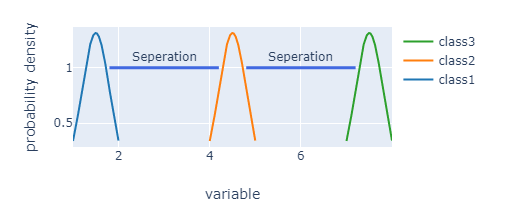](attachment:image.png)

- Overlapping **PDF** curves lead to worst classification 
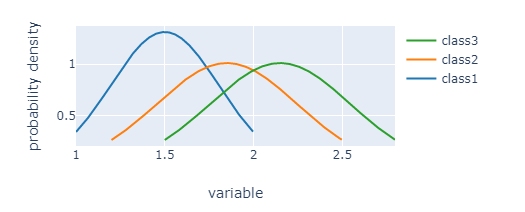](attachment:image.png)

Now let's perform univariate analysis on a subset of features using **PDF**.

#### b. Analysing wcc

In [ ]:
hist_data = [ais[ais["sex"]=="m"]["wcc"], ais[ais["sex"]=="f"]["wcc"]]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False,show_rug=False)
fig['layout'].update(title={"text" : 'Distribution of wcc count based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="wcc",yaxis_title="probability density")
fig.update_layout(width=500,height=500)

Since the pdf curves of **wcc** for both the gender categories are overlapping each other so it is very hard to come up with a condition for simple classfication.  

#### c. Analysing bmi

In [ ]:
hist_data = [ais[ais["sex"]=="m"]["bmi"], ais[ais["sex"]=="f"]["bmi"]]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False,show_rug=False)
fig['layout'].update(title={"text" : 'Distribution of Body mass index(BMI) based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="bmi",yaxis_title="probability density")
fig.update_layout(width=500,height=500)

Since the pdf curves of **bmi** for both the gender categories are overlapping each other so the simple classfication model will have a high level of missclassification. 

#### d. Analysing pcBfat

In [ ]:
hist_data = [ais[ais["sex"]=="m"]["pcBfat"], ais[ais["sex"]=="f"]["pcBfat"]]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False,show_rug=False)
fig['layout'].update(title={"text" : 'Distribution of percent Body fat(pcBfat) based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="pcBfat",yaxis_title="probability density")
fig.update_layout(width=500,height=500)

A simple model(as shown below) can be built using **pcBfat** but agian it leads to some misclassification.
``` 
if(pcBfat<=11.80):
    sex = "male"
else:
    sex = "female"
```

#### e. Analysing lbm

In [ ]:
hist_data = [ais[ais["sex"]=="m"]["lbm"], ais[ais["sex"]=="f"]["lbm"]]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False,show_rug=False)
fig['layout'].update(title={"text" : 'Distribution of lean body mass(lbm) based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="lbm",yaxis_title="probability density")
fig.update_layout(width=500,height=500)

A simple model(as shown below) can be built using **lbm** but agian it misclassifies the male points below 64.10 as female and the female points above 64.10 as male.
``` 
if(lbm<=64.10):
    sex = "female"
else:
    sex = "male"
```

### Univariate analysis using CDF

All the above simple models were leading to some sort of misclassification but using **PDF** we are unable to compute level of misclassification. The magnitude of misclassification error can be obtained using **CDF** curve.


#### a. Analysing rcc

In [ ]:
counts, bin_edges = np.histogram(ais[ais["sex"]=="m"]['rcc'],bins = 100, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_edges[1:], y=cdf,mode='lines',name = "male"))
counts, bin_edges = np.histogram(ais[ais["sex"]=="f"]['rcc'],bins = 100,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig.add_trace(go.Scatter(x=bin_edges[1:], y=cdf,mode='lines',name = "female"))
fig['layout'].update(title={"text" : 'CDF of rcc based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="rcc",yaxis_title="probability")
fig.update_layout(width=500,height=500)

From the CDF curves we can observe that upto 4.68(condition value from built model) 12.74% of the male are misclassified as female, similarly 19% of the female  are misclassified as male above 4.68. 

So the total misclassification error = 12.74 + 19 = 31.74% 

#### b. Analysing pcBfat

In [ ]:
counts, bin_edges = np.histogram(ais[ais["sex"]=="m"]['pcBfat'],bins = 200, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_edges[1:], y=cdf,mode='lines',name = "male"))
counts, bin_edges = np.histogram(ais[ais["sex"]=="f"]['pcBfat'],bins = 200,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig.add_trace(go.Scatter(x=bin_edges[1:], y=cdf,mode='lines',name = "female"))
fig['layout'].update(title={"text" : 'CDF of pcBfat based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="pcBfat",yaxis_title="probability")
fig.update_layout(width=500,height=500)

From the CDF curves we can observe that upto 11.80(condition value from built model) 18% of the female are misclassified as male, similarly 14.70% of the male  are misclassified as female above 11.80. 

So the total misclassification error = 18 + 14.70 = 32.70% 

#### c. Analysing lbm

In [ ]:
counts, bin_edges = np.histogram(ais[ais["sex"]=="m"]['lbm'],bins = 200, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_edges[1:], y=cdf,mode='lines',name = "male"))
counts, bin_edges = np.histogram(ais[ais["sex"]=="f"]['lbm'],bins = 200,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig.add_trace(go.Scatter(x=bin_edges[1:], y=cdf,mode='lines',name = "female"))
fig['layout'].update(title={"text" : 'CDF of lbm based on Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="lbm",yaxis_title="probability")
fig.update_layout(width=500,height=500)

From the CDF curves we can observe that upto 64.10(condition value from built model) 12.74% of the male are misclassified as female, similarly 7% of the female  are misclassified as male above 64.10. 

So the total misclassification error = 12.74 + 7 = 19.74% 

#### Conclusion

The best predictor based on misclassification error among rcc, pcBfat, lbm is lbm. 

## Types of Probability distribution

Based on the type of a random variable(discrete or continuous) there are two types of Probability distributions - Discrete and Continuous. In this course we are going to discuss following probability distributions.
1. Discrete probability distribution
    - Discrete uniform 
    - Binomial distribution
2. Continuous probability distribution
    - Continuous uniform
    - Normal distribution
    - Lognormal distribution

## 1. Normal distribution

Normal(Guassian) distribution is a bell shaped curve, its distribution pattern is observed in most of the natural phenomena such as height, weight, marks etc. It has two parameters - mean($\mu$) and standard deviation($\sigma$). 

PDF of a random variable which follows normal distribution is given as 

$$P(X=x) = \frac{1}{\sqrt{2\pi}\sigma}e^-\frac{(x-\mu)^2}{2\sigma^2}$$



### Properties of Normal Distribution

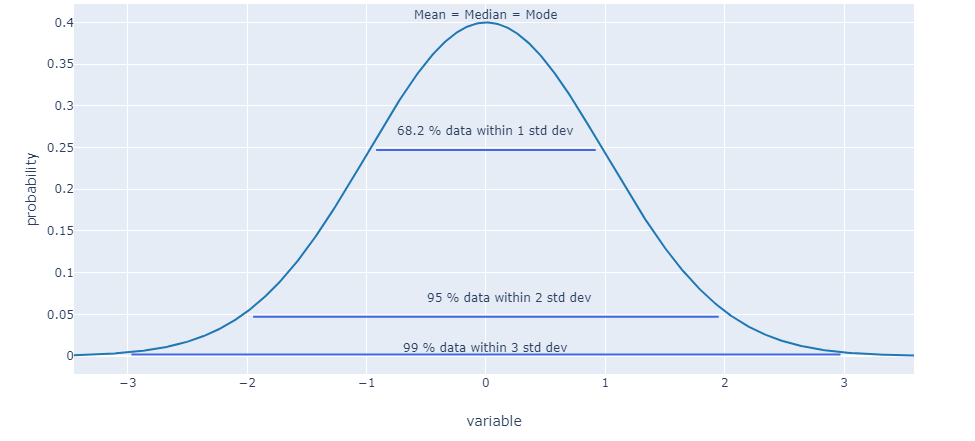](attachment:image.png)

- Mean = median = mode
- Symmetric in nature
- Total area under the curve  = 1
- As we move away from the mean, the PDF value decreases
- As the variance increases the distribution spread also increases and the curve becomes more wider 
- 68-95-99.7 Empirical rule
    - 68.2% of the data lies within one standard deviation away from the mean
    - 95% of the data lies within two standard deviation away from the mean
    - 99.7% of the data lies within three standard deviation away from the mean

If we know in advance that a variable follows normal distribution then we can easily tell many properties of the variable without looking at the actual data.


### Normality check of height, weight column through visualization and skewness

In [ ]:
fig = ff.create_distplot([ais["ht"]], ["ht"],show_hist=False,show_rug=False)
fig['layout'].update(title={'text':'Distribution of height','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="height",yaxis_title="probability")
fig.update_layout(showlegend = False,width=500,height=500)
fig

In [ ]:
fig = ff.create_distplot([ais["wt"]], ["wt"],show_hist=False,show_rug=False)
fig['layout'].update(title={'text':'Distribution of weight','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="weight",yaxis_title="probability")
fig.update_layout(showlegend = False,width=500,height=500)
fig

From the curves we can easily observe that height and weight are almost normally distributed but there exist a small amount of asymmetricity which can be measured through **skewness**.  

**skewness** - it is a statistical parameter to measure asymmetricity about the mean in a distribution of random variable. This paramtere value can be positive, negative or undefined. A negative value indicates data is left skewed whereas a positive value indicates data is right skewed.

In [ ]:
from scipy.stats import skew
print("Skewness of height parameter : ", skew(ais["ht"]))
print("Skewness of weight parameter : ", skew(ais["wt"]))

Here, height is slightly skewed to the left whereas weight is slightly to the right.

Now let's try to answer the below questions.
- What % of athelete has height <=165 cm?
- What % of athelete has height between 165 and 185 cm?
- What % of athelete has height >185 cm?

For a random variable with finite mean and standard deviation, these above questions can be easily answered using **Chebyshev's inequality**.  

Assume for a moment that height strongly follows normal distibution then its distribution would have looked like below - 

In [ ]:
fig = ff.create_distplot([ais["ht"]], ["ht"],show_hist=False,show_rug=False,curve_type="normal")
fig['layout'].update(title={'text':'Distribution of height','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="height",yaxis_title="probability")
fig.update_layout(showlegend = False,width=500,height=500)
fig

If height feature had perfectly followed normal distibution then above questions would have easily answered using CDF of normal distribution

In [ ]:
from scipy.stats import norm
print("% of atheletes heights falling below 165 cm is : ", norm.cdf(165, loc = np.mean(ais["ht"]), scale = np.std(ais["ht"])))
print("% of atheletes heights falling between 165 and 185 cm is : ", norm.cdf(185, loc = np.mean(ais["ht"]), scale = np.std(ais["ht"])) - norm.cdf(165, loc = np.mean(ais["ht"]), scale = np.std(ais["ht"])))
print("% of atheletes heights falling above 185 cm is : ", 1- norm.cdf(185, loc = np.mean(ais["ht"]), scale = np.std(ais["ht"])))

### Normality test

Normality test are used to determine whether the data is normally distribution or not OR whether the sample data comes from normally distributed population or not.    
There are various kind of graphical and numeric tests to determine this.
- Graphical tests
    - Histogram/density plot
    - Q-Q plot
- Numeric tests
    - Shapiro-Wilk test
    - Kolmogorov-Smironv test

#### a. QQ Plot

It is a graphical method for comparing two probability distributions by plotting their quantiles against each other. For normality test one distribution is w.r.t. given sample that we want to test and the another distribution is the standard normal distribution.
There are builtin methods available in statsmodels and scipy package to plot Q-Q plot. We can also plot it manually. 

**Steps for plotting Q-Q plot manually**

Assume X is a random variable representing the given sample and Y$\backsim(0,1)$ is a random variable that follows standard normal distribution with mean($\mu$) equals to 0 and standard deviation($\sigma$) equals to 1.
- Compute all the percentiles of X. Say $x_{1}^{'}$, $x_{2}^{'}$, $x_{3}^{'}$...............$x_{100}^{'}$. These percentiles are also known as sample quantiles.
- Compute all the percentiles of Y. Say $y_{1}^{'}$, $y_{2}^{'}$, $y_{3}^{'}$...............$y_{100}^{'}$. These percentiles are also known as theoritical quantiles.
- Plot each percentile of X against the same percentile of Y. i.e. 2d points are formed as ($x_{1}^{'}$, $y_{1}^{'}$), ($x_{2}^{'}$,$y_{2}^{'}$), ......... ($x_{100}^{'}$, $y_{100}^{'}$).
- If all the points lie on a straight line(reference line $y=x$) then X follows a normal distribution.  


In [ ]:
from scipy.stats import probplot
qq = probplot(ais["wt"], dist='norm')
x = np.array([qq[0][0][0],qq[0][0][-1]])
fig = go.Figure()
fig.add_trace(go.Scatter(x=qq[0][0],y=qq[0][1], mode = 'markers',showlegend=False))
fig.add_trace(go.Scatter(x=x,y=qq[1][1] + qq[1][0]*x,showlegend=False,mode='lines'))
fig['layout'].update(title={'text':'Q-Q plot of height','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Theoretical quantiles",yaxis_title="Sample quantiles")
fig.update_layout(width=500,height=500)
fig

From the plot can we assume height feature follows normal distribution?

Here, most of the points fall about the reference line so our assumption seems to fairly safe.

#### b. Shapiro-Wilk test

It's a numeric test to check whether a sample is normally distributed or not. It is a hypothesis based test where null and alternate hypothesis is defined as below - 

$H_0$(Null Hypothesis) - Sample is normally distributed

$H_{1}$(Alternate Hypothesis) - Sample is not normally distributed

This, if the p value obtained for the W statistic is less than significance level($\alpha$) then null hypothesis is rejected On the other hand, if the p value is greater than $\alpha$ then we failed to reject null hypothesis.

In [ ]:
from scipy.stats import shapiro
print("p-value obtained from Shapiro-Wilk test : ", shapiro(ais["ht"])[1])

Here for $\alpha$ = 0.05, obtained p value(0.2120) > $\alpha$ , so we failed to reject null hypothesis i.e height came from a normally distributed population.

#### c. Kolmogorov–Smirnov(K-S) test 

K-S test provides a way to - 
- check whether a sample is drawn from a reference probability distribution or not(one-sample K–S test)
- check whether two samples are drawn from the same distribution or not(two-sample K–S test)

It is a hypothesis based test where null and alternate hypothesis for one-sample K–S test is defined as below - 

$H_{0}$(Null Hypothesis) - Sample follows the reference distribution

$H_{1}$(Alternate Hypothesis) - Sample does not follow the reference distribution

In [ ]:
from scipy.stats import kstest
print(kstest(ais["ht"],"norm", args = (np.mean(ais["ht"]), np.std(ais["ht"]))))

Here for $\alpha$ = 0.05, obtained p value(0.7958) > $\alpha$ , so we failed to reject null hypothesis i.e height follows normal distribution.

### Chebyshev inequality

By following 68-95-99.7 Empirical rule of a normally distributed dataset, we know that what % of data lies within $k$ standard deviation from the mean but what if the data does not follow normal distribution? OR how to know what fraction of data lies within $k$ standard deviation from the mean for any random distribution?

To answer such questions pertaining to dispersion of data for a random distribution Chebyshev inequality is used.

**Chebyshev inequality** states that no more than $\frac{1}{k^2}$ fraction of data falls more than $k$ standard deviations away from the mean $$P(\left\lvert{X-\mu}\right\rvert>=k\sigma) <= \frac{1}{k^2}$$

$$P(X>=\mu + k\sigma \;\;|\;\;X<=\mu - k\sigma) <= \frac{1}{k^2}$$

in simplifed terms
$$P(\mu-k\sigma <= X <= \mu-k\sigma) > 1- \frac{1}{k^2}$$

In other words, at least $(1- \frac{1}{k^2})$ fraction of data falls within $k$ standard deviations from the mean for a sample with finite mean and finite standard deviation.

Let's explore the inequality more with a few values of $k$.

- For $k$ = 2, $(1- \frac{1}{k^2})$ = 0.75 i.e. at least 75% of the data falls within two standard deviations of the mean for any random distribution.
- For $k$ = 3, $(1- \frac{1}{k^2})$ = 0.89 i.e. at least 89% of the data falls within three standard deviations of the mean for any random distribution.


In [ ]:
print("mean:",np.mean(ais["ht"]))
np.std(ais["ht"])

Let's try to answer following questions using Chebyshev inequality.
- What % of athelete has height between 160.68 and 199.52 cm?
- What % of athelete has height between 150.97 and 209.23 cm?

In [ ]:
def Chebyshev(low_limit, mean, std):
    k = (mean - low_limit) / std
    #k = (np.mean(data) - low_limit) / np.std(data) 
    return (1-(1/(k**2)))

In [ ]:
print("% of athelete having height between 160.68 and 199.52 cm : ", Chebyshev(160.68,np.mean(ais["ht"]),np.std(ais["ht"])))
print("% of athelete having height between 150.97 and 209.23 cm : ", Chebyshev(150.97,np.mean(ais["ht"]),np.std(ais["ht"])))

## 2. LogNormal distribution 

A random variable X is said to be lognormally distributed if natural logarithm of X is normally distributed. In other words X$\backsim LogNormal$($\mu$,$\sigma$) if $\log{(X)}$ is normally distributed. 

PDF of a log normally distributed random variable is given as 

$$P(X=x) = \frac{1}{x\sqrt{2\pi}\sigma}e^-\frac{(\log{x}-\mu)^2}{2\sigma^2}$$


Let's plot the distribution of **ferr** feature. 

In [ ]:
fig = ff.create_distplot([ais["ferr"]], ["ferr"],show_hist=False,show_rug=False)
fig['layout'].update(title={'text':'Distribution of height','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="height",yaxis_title="probability")
fig.update_layout(showlegend = False,width=500,height=500)
fig

We can observe that **ferr** feature follows some sort of log normal distribution where the right portion has long tall than the left one. 

#### Comparing distribution of ferr against log normal distribution using QQ plot

QQ plot can be used to compare two probability distributions by plotting their quantiles against each other.

In [ ]:
qq = probplot(ais["ferr"], dist='lognorm',sparams=(1,0))
x = np.array([qq[0][0][0],qq[0][0][-1]])
fig = go.Figure()
fig.add_trace(go.Scatter(x=qq[0][0],y=qq[0][1], mode = 'markers',showlegend=False))
fig.add_trace(go.Scatter(x=x,y=qq[1][1] + qq[1][0]*x,showlegend=False,mode='lines'))
fig['layout'].update(title={'text':'Q-Q plot of height for log-normality','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Theoretical quantiles",yaxis_title="Sample quantiles")
fig.update_layout(width=500,height=500)
fig

From the above QQ plot we can observe that most of the points are not closely residing on the reference line so ferr feature does not strictly follow log normal distribution. 

## 3. Binomial distribution

Binomial distribution is a discrete probability distribution for obtaining exactly $k$ successes out of $n$ Bernoulli trails. 

Characteristics of a Bernoulli trails - 
- Each trail has only two possible outcomes - success and failure.
- Total number of trails are fixed.
- Probability of success and failure remains same through out all the trails.
- The trails are independent of each other. 

Binomial distribution is a way of calculating the probability of $k$ successes from $n$ Bernoulli trails.

The PMF of a binomial random variate is given as 

\begin{equation*}
P(X=k)   = {n \choose k} p^k (1-p)^{ n-k}
\end{equation*}

where p = probability of success and (1-p) = probability of failure

k = number of successes and (n-k) = number of failures


From the underlying dataset, we can observe that only 12.37%(25/202) atheletes play Basketball, Now if we choose a random sample of 50 atheletes then 
- What is the probability that exactly two atheletes play basketball?
- What is the probability that at most 10 atheletes play basketball?
- What is the probability that at least 20 atheletes play basketball?

Since all the above questions hold a varying number of successes(2,10,20) from fixed number of trails(50) with p = 0.1237 so binomial distribution can be used to answer these questions.

In [ ]:
from scipy.stats import binom
n= 50 #total number of fixed trials
p= 0.1237 #probability of success
print("probability that exactly two atheletes play basketball : ", binom.pmf(2,50,0.1237))
print("probability that exactly at most 10 atheletes play basketball : ", binom.cdf(10,50,0.1237))
print("probability that exactly at least 20 atheletes play basketball : ", np.round((1- binom.cdf(20,50,0.1237)) + binom.pmf(20,50,0.1237)))

In [ ]:
n = 50
p = 0.1237
x1 = np.arange(0, 12,2)
y1 = binom.pmf(x1, n, p)
fig = go.Figure([go.Bar(x=x1, y=y1)])
fig['layout'].update(title={"text" : 'PMF - Binomial Distribution','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="# of successes in 50 trails",yaxis_title="prob.")
fig.update_layout(width=500,height=500)
fig

## 4. Uniform distributions

Based on the type of random variable there are two types of uniform distributions.
1. Discrete uniform distribution for discrete random variable
2. Continuous uniform distribution for continuous random variable

### 4.a Discrete uniform distribution

A discrete uniform distribution is a symmetric distribution with following properties. 

- It has fixed number of outcomes.
- All the outcomes are equally likely to occur.

If a random variable $X$ follows discrete uniform distribution and it has $k$ discrete values say $x_{1}$, $x_{2}$, $x_{3}$,.....$x_{k}$, then PMF of $X$ is given as 
$$P(X=x_{k}) = \frac{1}{k}$$


From the given dataset, we can observe that **sex** feature has two possible values male and female. There is almost equal number of male(100) and female(102) atheletes so if we assume that **sex** feature strictly follows uniform distribution then 
$$P(X=male) = P(X=female) =  \frac{1}{2} = 0.5$$

In [ ]:
fig = go.Figure([go.Bar(x=ais["sex"].value_counts().index, y=ais["sex"].value_counts().values)])
fig['layout'].update(title={"text" : 'Distribution of Sex','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Sex",yaxis_title="count")
fig.update_layout(width=500,height=500)
fig

So there is 50% chance that a random athelete will be man, similarly therte is 50% chance for a random athelete to be female. 

### 4.b Continuous uniform distribution

If a continuous uniformly distributed random variable $X$ is defined in a and b then PDF of $X$ is given as 
$$P(X=x_{k}) = \frac{1}{b-a}$$


Let's consider a subset of data having wcc values between 4.40 and 5.40 for one set and between 7.70 and 9.90 for another set. Distribution of this subset of data is as shown below where probability is same across all three bins of continuous range.  

In [ ]:
hist_data = [ais[((ais["wcc"]>=7.70) & (ais["wcc"]<=9.90)) | ((ais["wcc"]>=4.40) & (ais["wcc"]<5.50))]["wcc"]]
group_labels = ["wcc"]
fig = ff.create_distplot(hist_data, group_labels, bin_size=1.10,show_curve=False, show_rug = False,histnorm = "probability")
fig['layout'].update(title={"text" : 'Distribution of wcc','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="wcc",yaxis_title="prob.")
fig.update_layout(width=500,height=500)
fig